### Assignment Advanced Regression by Surya Chandra

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

- The company wants to know:

1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [70]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [71]:
#Read the Dataframe from csv file

df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [73]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [74]:
df.shape

(1460, 81)

In [75]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [76]:
#Checking for the null counts
mask = df.isnull().any()
filtered_df = df.loc[:, mask]
null_counts = filtered_df.isnull().sum()
print(null_counts)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [77]:
# Calculating the percentage of null values in each column
null_percent = df.isnull().sum() / len(df)

for col, percent in null_percent.items():
    if percent > 0:
        print(f'{col}, {percent*100:.2f}%')


LotFrontage, 17.74%
Alley, 93.77%
MasVnrType, 0.55%
MasVnrArea, 0.55%
BsmtQual, 2.53%
BsmtCond, 2.53%
BsmtExposure, 2.60%
BsmtFinType1, 2.53%
BsmtFinType2, 2.60%
Electrical, 0.07%
FireplaceQu, 47.26%
GarageType, 5.55%
GarageYrBlt, 5.55%
GarageFinish, 5.55%
GarageQual, 5.55%
GarageCond, 5.55%
PoolQC, 99.52%
Fence, 80.75%
MiscFeature, 96.30%


In [78]:
# Finding the list of columns with more than 15% null values
cols_to_drop = null_percent[null_percent > 0.15].index
print(cols_to_drop)


Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [79]:
# Droping the columns with more than 15% nulls from the DataFrame
df_dropped = df.drop(cols_to_drop, axis=1)

In [80]:
df_dropped.shape

(1460, 75)

In [81]:
# Calculate the percentage of null values in each column
null_percent_dropped = df_dropped.isnull().sum() / len(df_dropped)

for col, percent in null_percent_dropped.items():
    if percent > 0:
        print(f' {col}, {percent*100:.2f}%')

 MasVnrType, 0.55%
 MasVnrArea, 0.55%
 BsmtQual, 2.53%
 BsmtCond, 2.53%
 BsmtExposure, 2.60%
 BsmtFinType1, 2.53%
 BsmtFinType2, 2.60%
 Electrical, 0.07%
 GarageType, 5.55%
 GarageYrBlt, 5.55%
 GarageFinish, 5.55%
 GarageQual, 5.55%
 GarageCond, 5.55%


In [82]:
df_dropped = df_dropped.dropna(axis=0)
df_dropped.shape

(1338, 75)

In [83]:
#Dropping ID Column
df_dropped = df_dropped.drop(['Id'], axis=1)

In [84]:
df_dropped = df_dropped.dropna(axis=0)
df_dropped.shape

(1338, 74)

In [85]:
df_dropped.GarageYrBlt

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1338, dtype: float64

In [86]:
print(df_dropped.columns[df_dropped.dtypes == object])

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [87]:
print(df_dropped.columns[df_dropped.dtypes == 'int64'])

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [88]:
print(df_dropped.columns[df_dropped.dtypes == 'float64'])

Index(['MasVnrArea', 'GarageYrBlt'], dtype='object')


In [89]:
#Converting two float64 type columns to Int64
df_dropped['GarageYrBlt'] = df_dropped['GarageYrBlt'].astype('int64')
df_dropped['MasVnrArea'] = df_dropped['MasVnrArea'].astype('int64')

In [90]:
#Getting the difference between current year and year in the records for YearBuilt, YearRemodAdd and GarageYrBlt columns
df_dropped['YearBuilt_Diff'] = pd.datetime.now().year - df_dropped['YearBuilt']
df_dropped['YearRemodAdd_Diff'] = pd.datetime.now().year - df_dropped['YearRemodAdd']
df_dropped['GarageYrBlt_Diff'] = pd.datetime.now().year - df_dropped['GarageYrBlt']

In [91]:
# Numeric Columns as per the Data Dictionary
num_cols = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                  'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                  'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                  'ScreenPorch', 'PoolArea', 'MiscVal', 'YearBuilt_Diff', 'YearRemodAdd_Diff', 'GarageYrBlt_Diff',
                  'SalePrice']
len(num_cols)

31

In [92]:
#Categorical Columns
cat_cols = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
                    'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                    'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
                    'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 
                    'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

len(cat_cols)

43

In [93]:
data = df_dropped

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MSSubClass         1338 non-null   int64 
 1   MSZoning           1338 non-null   object
 2   LotArea            1338 non-null   int64 
 3   Street             1338 non-null   object
 4   LotShape           1338 non-null   object
 5   LandContour        1338 non-null   object
 6   Utilities          1338 non-null   object
 7   LotConfig          1338 non-null   object
 8   LandSlope          1338 non-null   object
 9   Neighborhood       1338 non-null   object
 10  Condition1         1338 non-null   object
 11  Condition2         1338 non-null   object
 12  BldgType           1338 non-null   object
 13  HouseStyle         1338 non-null   object
 14  OverallQual        1338 non-null   int64 
 15  OverallCond        1338 non-null   int64 
 16  YearBuilt          1338 non-null   int64 


In [95]:
# ?sns.scatterplot

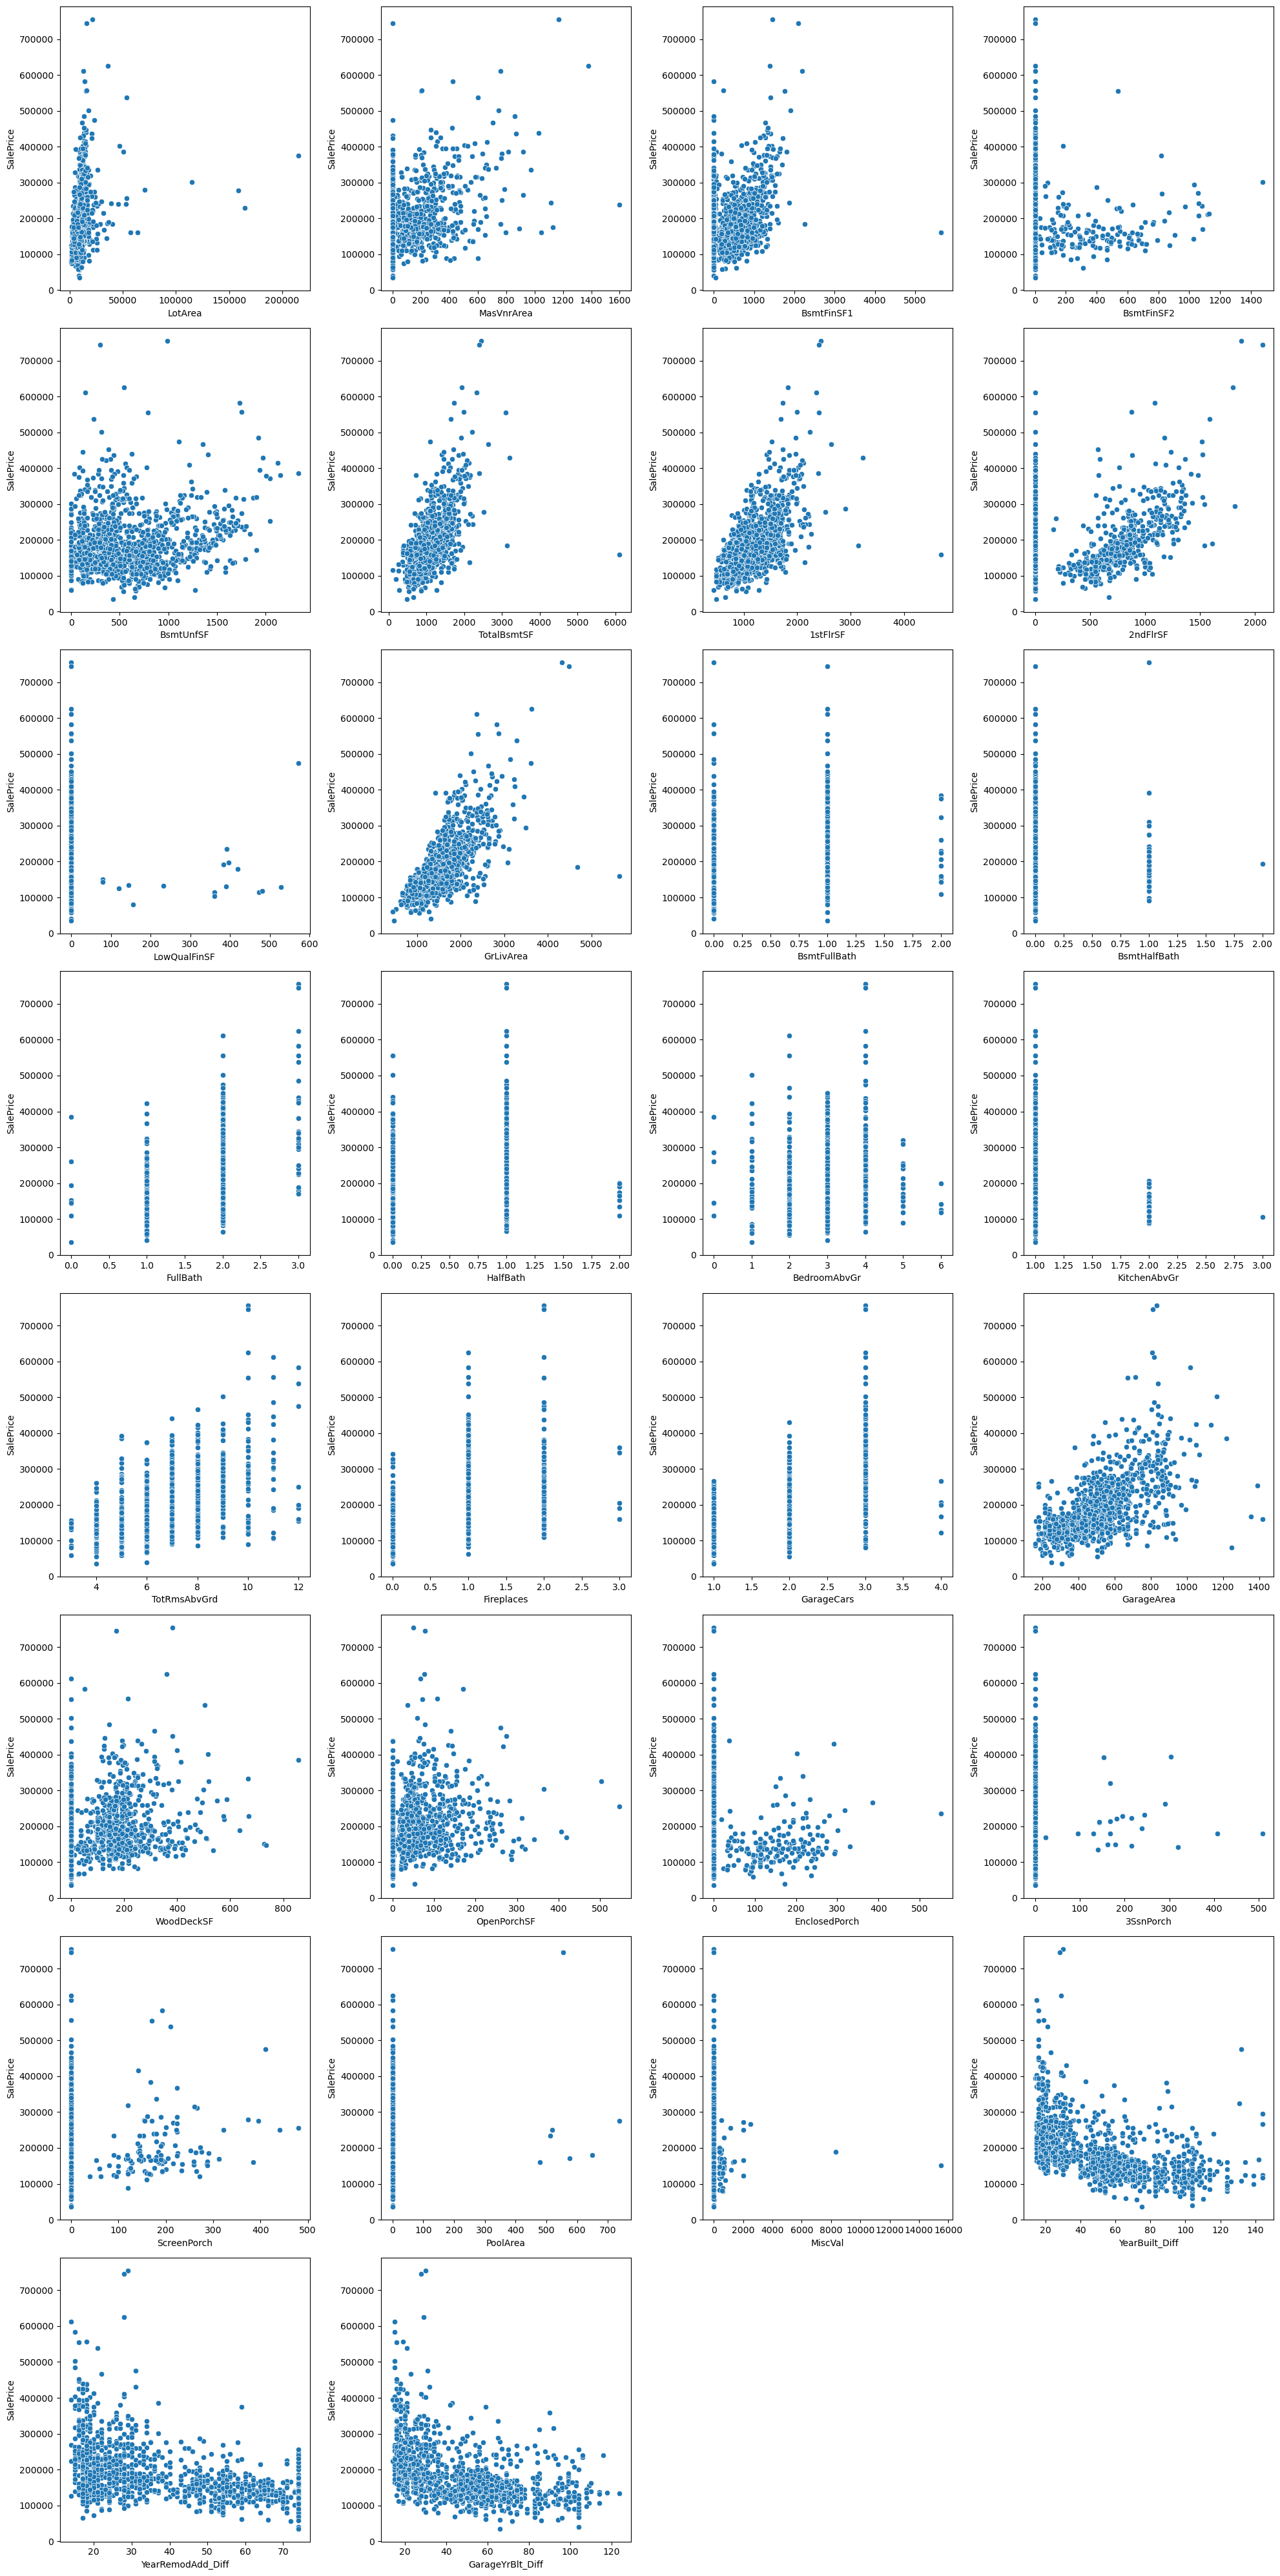

In [96]:
#Scatterplot of Numeric columns to understand relation betweens SalePrice and respective variables
fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(20, 40))

axs = axs.flatten()

for i,col in enumerate([c for c in num_cols if c != 'SalePrice']):
    sns.scatterplot(x=col, y='SalePrice', data=data, palette='rainbow', ax=axs[i])

for i in range(30, 32):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


### Observation: 
Multiple variables seems to have lineria relation with SalePrice

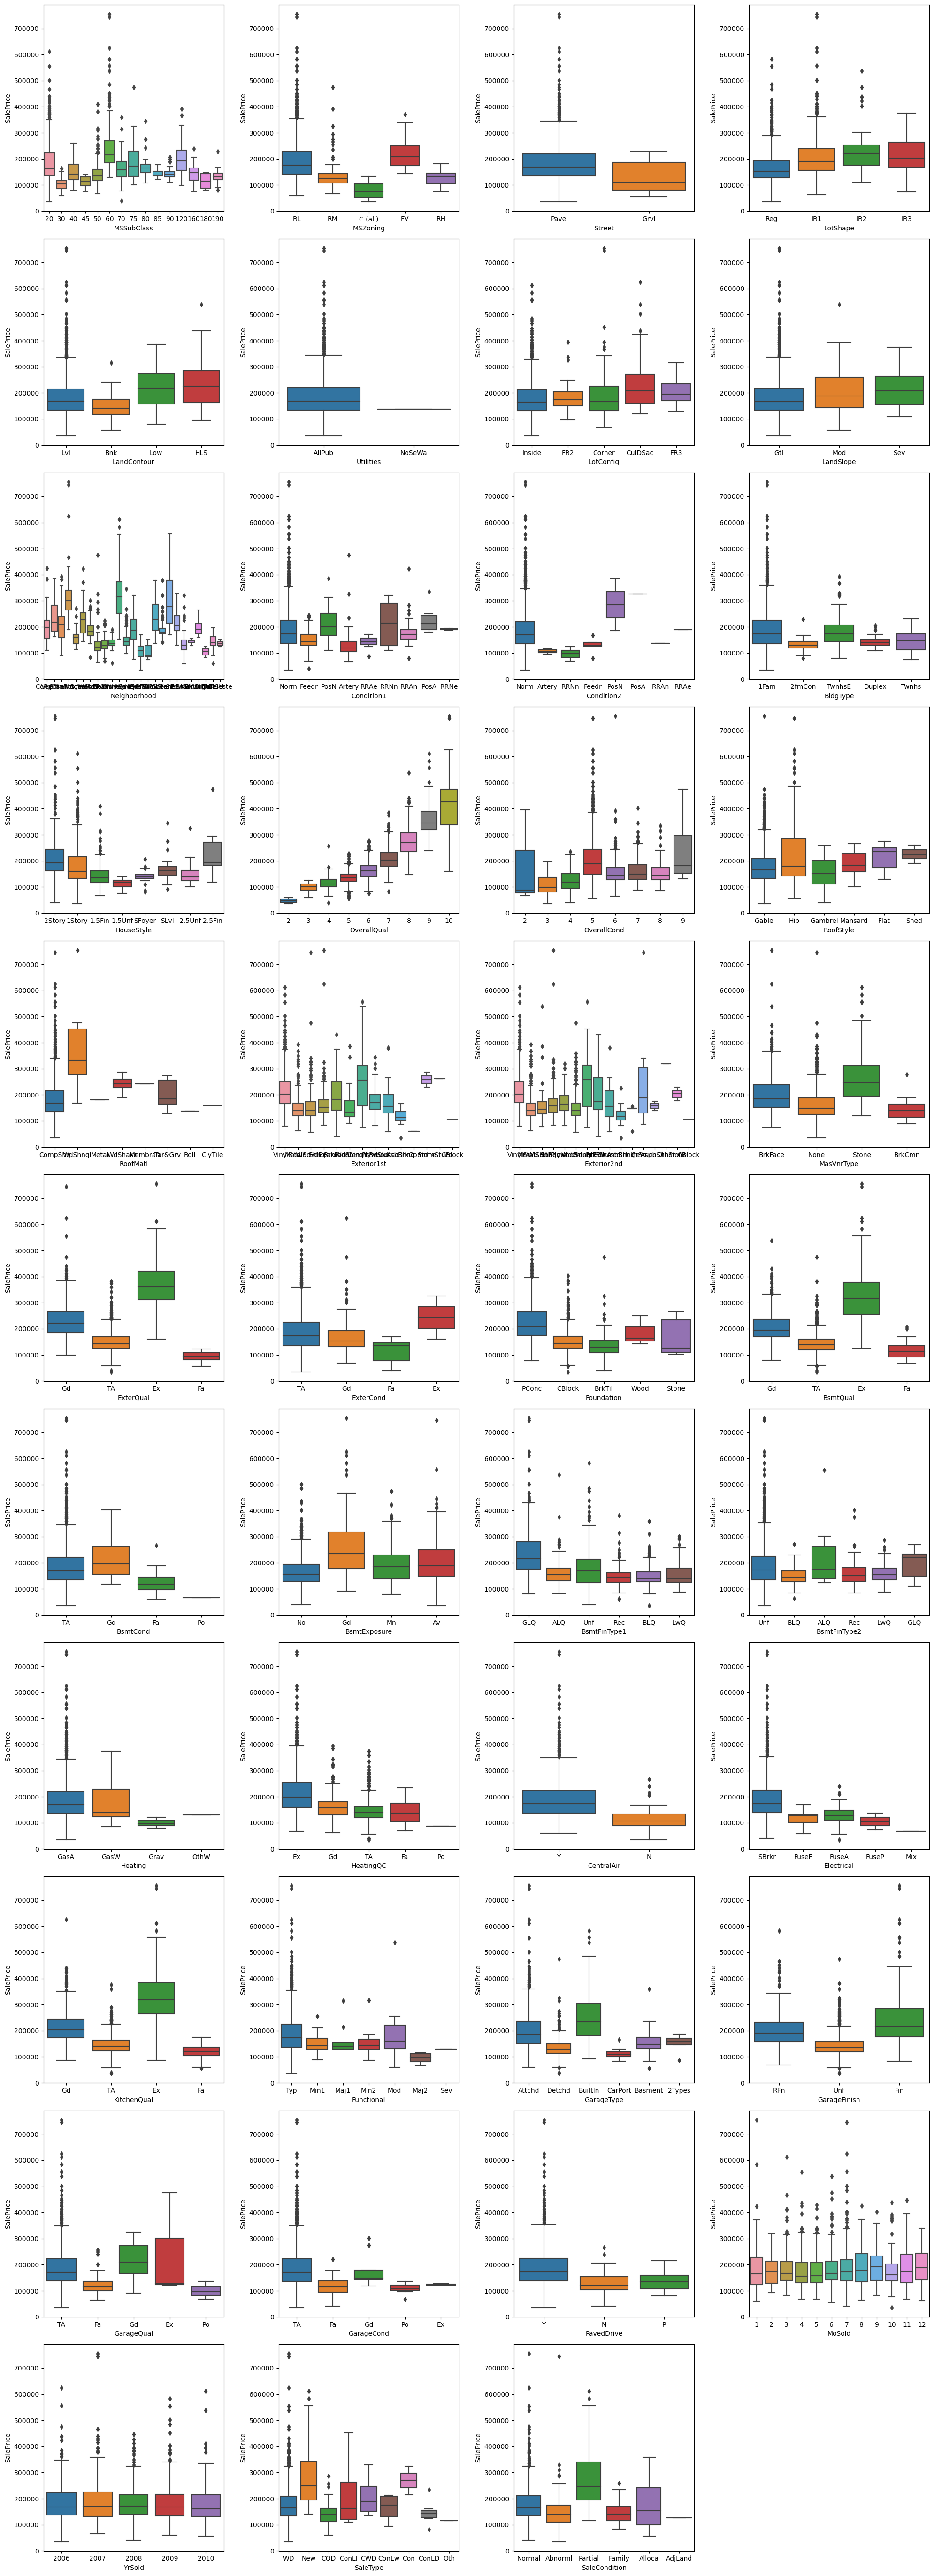

In [97]:
# Box plots for Categorical variables
fig, axs = plt.subplots(nrows=11, ncols=4, figsize=(20, 55))
axs = axs.flatten()

for i, col in enumerate(cat_cols):
    sns.boxplot(x=col, y="SalePrice", data=data, ax=axs[i])


for i in range(43, 44):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

<Axes: >

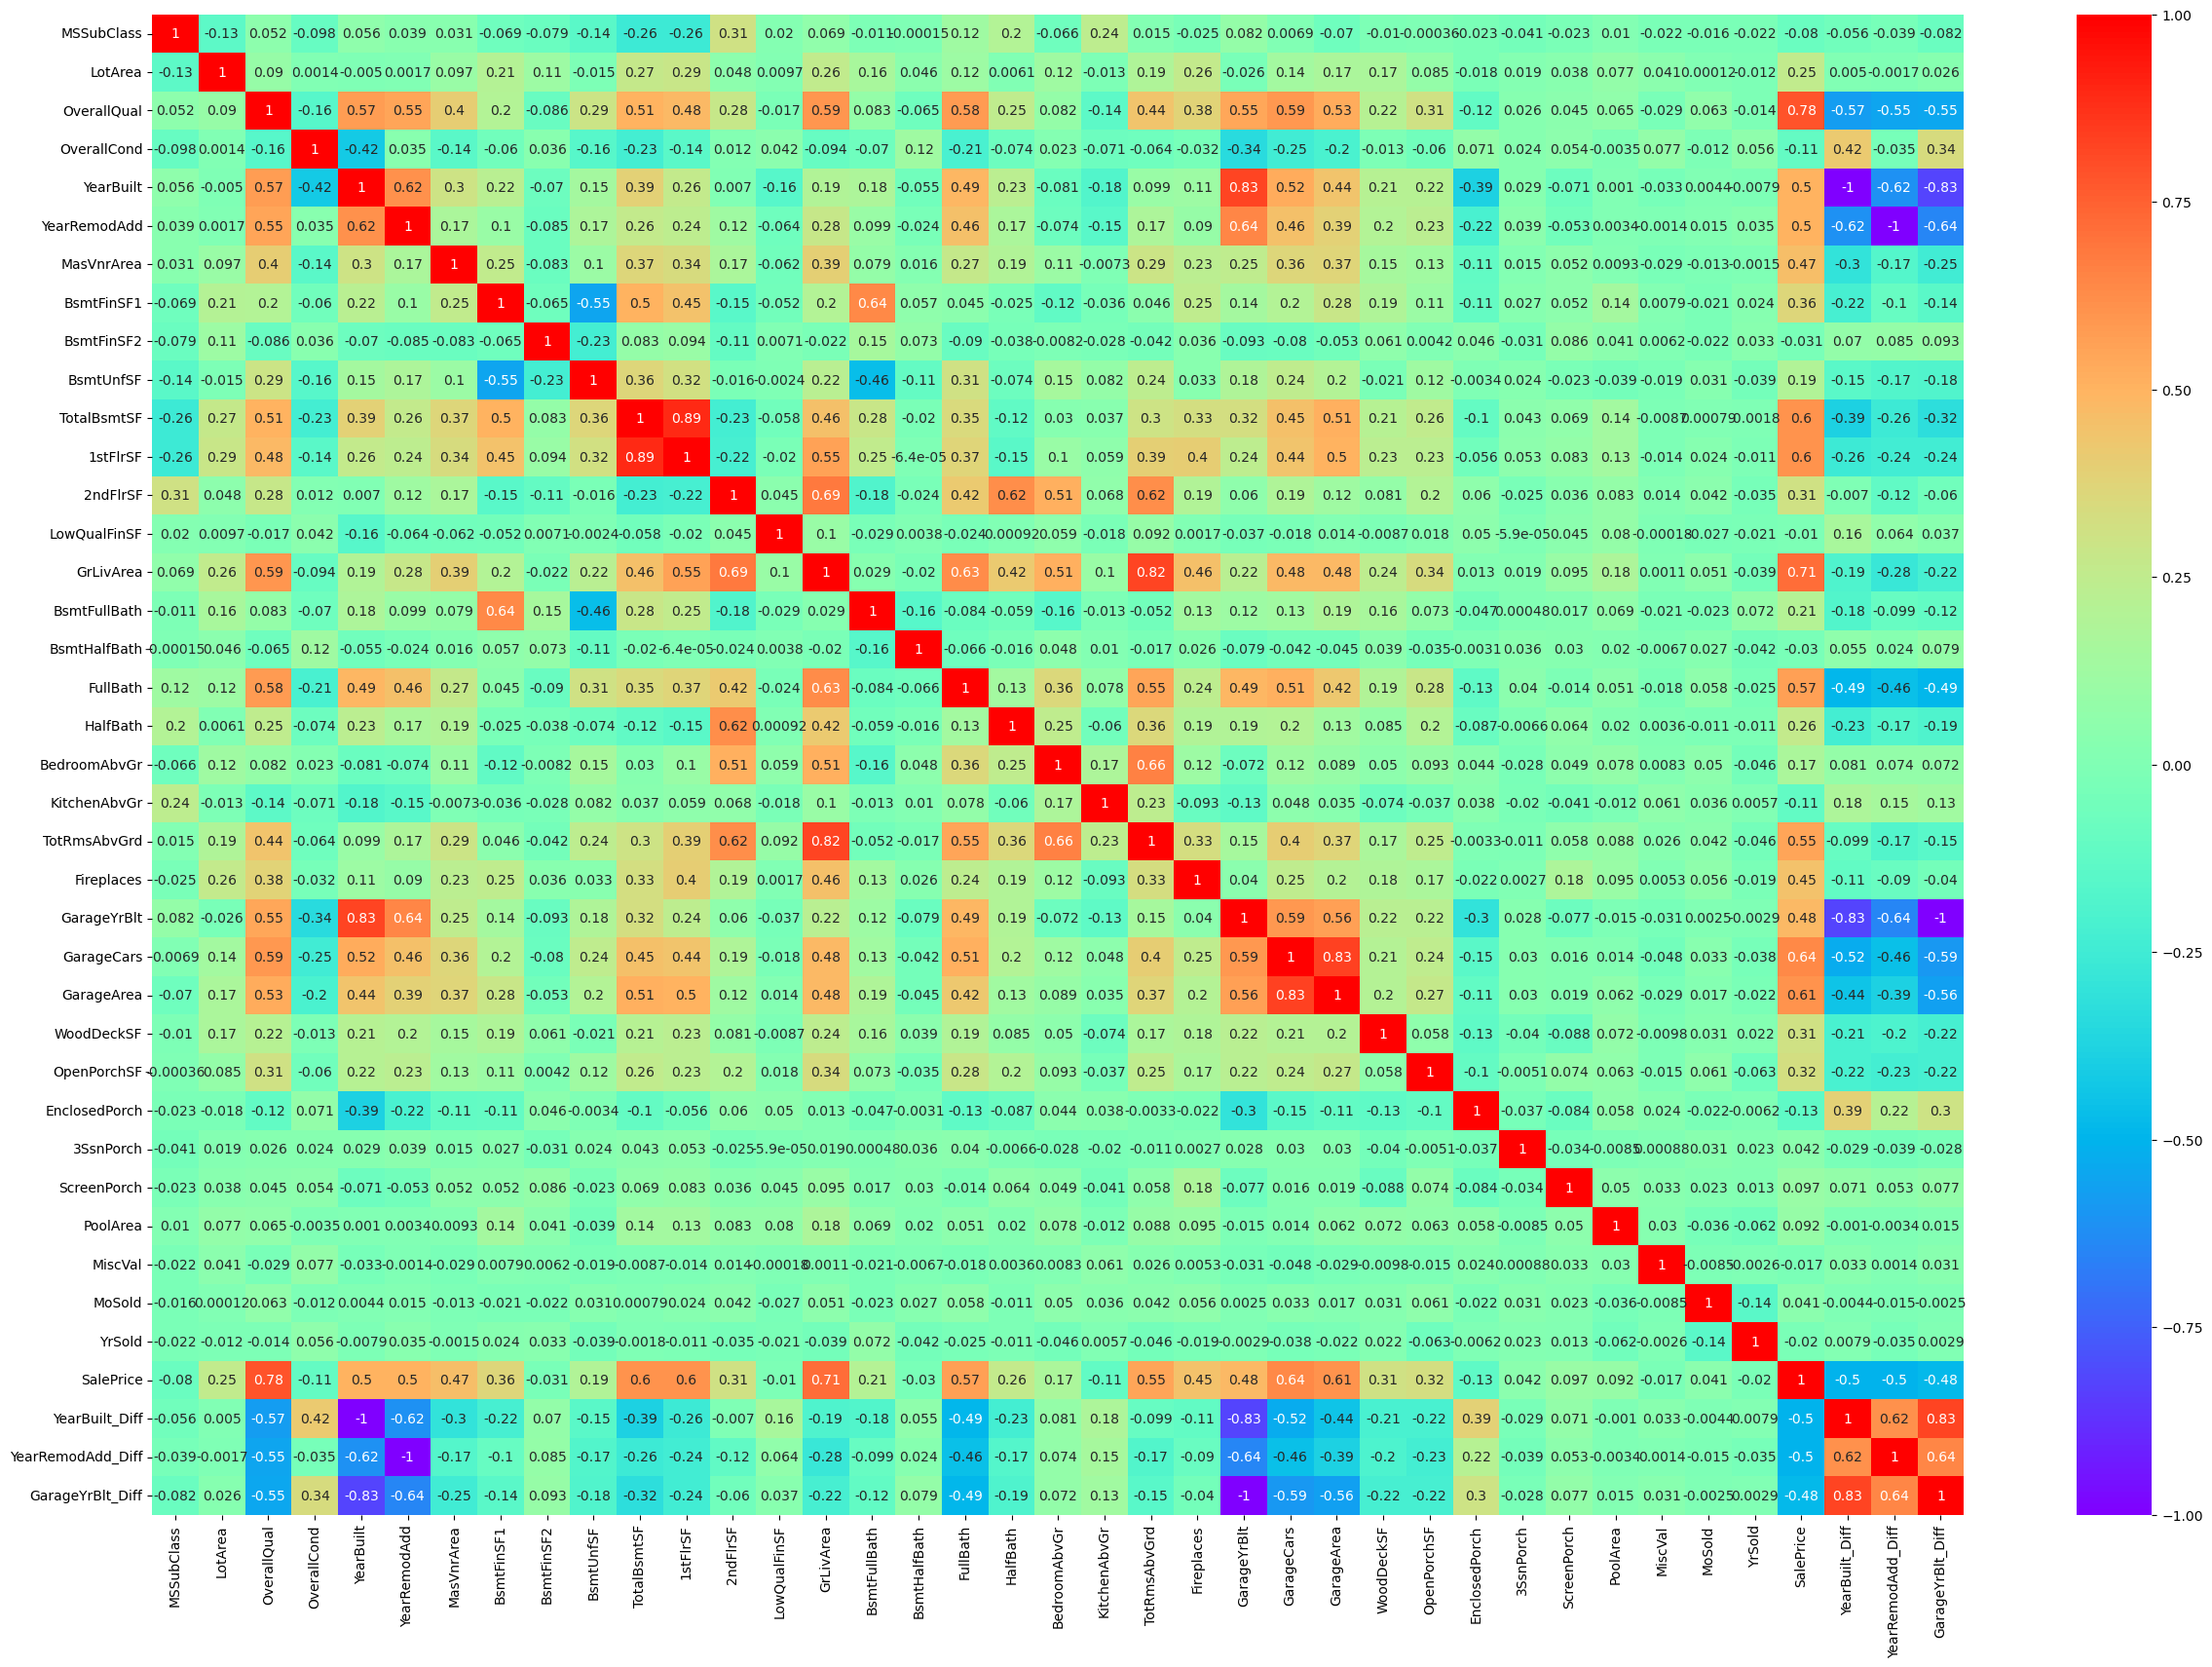

In [98]:
# Checking the correlation between the variables
plt.figure(figsize=(30,20))
data_corr = data.corr()
sns.heatmap(data_corr, cmap="rainbow", annot=True)

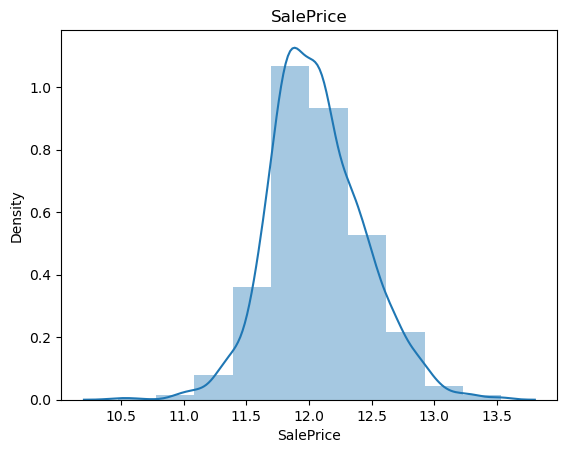

In [99]:
data2 = data
data2['SalePrice'] = np.log1p(data2['SalePrice'])

plt.title('SalePrice')
sns.distplot(data2['SalePrice'], bins=10)
plt.show()

In [100]:
data.shape

(1338, 77)

In [101]:
#Creating Dummy Variables
data[cat_cols] = data[cat_cols].astype('object')
dummy = pd.get_dummies(data[cat_cols], drop_first=True)
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [102]:
data.drop(cat_cols, axis=1, inplace=True)
data1 = pd.concat([data, dummy], axis=1)
data1.shape

(1338, 269)

In [103]:
#Handling Outliers
def drop_outliers(df=data1):

    for column in num_cols:
        Q1 = df[column].quantile(.25)
        Q3 = df[column].quantile(.99)
        IQR = Q3 - Q1
        df = df[(df[column] >= (Q1 - (1.5 * IQR))) & df[column] <= (Q3 + (1.5 * IQR))]
    return df

In [104]:
data = drop_outliers(data1)
data.shape

(1336, 269)

### Splitting to Train and Test sets

In [105]:
y = data.pop('SalePrice')
X = data

In [106]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [107]:
# Generating a 70:30 split using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

### Liner Regression

In [108]:
# linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [109]:
# Predicting the train set
y_train_pred = lr.predict(X_train)

# r2_score
r2_score(y_train, y_train_pred)

0.9586507216186626

In [110]:
# Predicting the test set
y_test_pred = lr.predict(X_test)

# r2_score
r2_score(y_test, y_test_pred)

0.8477687108132392

In [111]:
# Checking the parameters of the Linear Regression model
print(lr.intercept_)
list(zip(list(lr.coef_), X.columns))

5.473926929384591


[(3.60341370093777e-06, 'LotArea'),
 (0.0009305770536138017, 'YearBuilt'),
 (0.0004109766110173451, 'YearRemodAdd'),
 (6.270051019936383e-06, 'MasVnrArea'),
 (5.0392318061582946e-05, 'BsmtFinSF1'),
 (4.682655020949453e-05, 'BsmtFinSF2'),
 (5.721436969186727e-06, 'BsmtUnfSF'),
 (0.00010294029787585803, 'TotalBsmtSF'),
 (7.455437814049624e-05, '1stFlrSF'),
 (7.46031277073509e-05, '2ndFlrSF'),
 (1.1627586213225263e-05, 'LowQualFinSF'),
 (0.00016078531243579955, 'GrLivArea'),
 (0.015949255930208055, 'BsmtFullBath'),
 (0.014511105348894413, 'BsmtHalfBath'),
 (0.023019251152305263, 'FullBath'),
 (0.02411511600872283, 'HalfBath'),
 (-0.005587739286784437, 'BedroomAbvGr'),
 (-0.08843464014893476, 'KitchenAbvGr'),
 (-0.0020865072898630793, 'TotRmsAbvGrd'),
 (0.02584603594533381, 'Fireplaces'),
 (-0.00020629517920455398, 'GarageYrBlt'),
 (0.03432331025175883, 'GarageCars'),
 (7.561015782926858e-05, 'GarageArea'),
 (0.00011457632752718584, 'WoodDeckSF'),
 (0.00011737872494294136, 'OpenPorchSF'),


### Ridge Regression

In [112]:

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                    0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge=Ridge()

folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [113]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007200,7.471340e-04,0.002600,4.910699e-04,0.0001,{'alpha': 0.0001},-0.103750,-0.103024,-0.075868,-0.100761,...,-0.097182,0.010703,25,-0.050938,-0.049107,-0.052106,-0.050193,-0.049688,-0.050406,0.001041
1,0.005808,7.480625e-04,0.001589,4.580529e-04,0.001,{'alpha': 0.001},-0.103329,-0.102614,-0.075961,-0.100622,...,-0.096971,0.010543,24,-0.051019,-0.049171,-0.052192,-0.050210,-0.049754,-0.050469,0.001052
2,0.006403,1.021905e-03,0.002197,4.011445e-04,0.01,{'alpha': 0.01},-0.101090,-0.099950,-0.077473,-0.099568,...,-0.095984,0.009290,23,-0.051894,-0.050166,-0.053407,-0.050433,-0.050628,-0.051305,0.001207
3,0.006602,4.889284e-04,0.002798,3.994698e-04,0.05,{'alpha': 0.05},-0.098512,-0.098707,-0.081448,-0.097372,...,-0.095621,0.007258,22,-0.055550,-0.054068,-0.057435,-0.051121,-0.053924,-0.054420,0.002079
4,0.005805,7.556623e-04,0.001999,6.326359e-04,0.1,{'alpha': 0.1},-0.097535,-0.099121,-0.082226,-0.096102,...,-0.095514,0.006986,21,-0.058071,-0.056402,-0.059784,-0.051575,-0.056014,-0.056369,0.002745
5,0.005401,4.903514e-04,0.001600,4.895316e-04,0.2,{'alpha': 0.2},-0.096805,-0.099235,-0.081848,-0.094559,...,-0.095036,0.007130,20,-0.060264,-0.058556,-0.061827,-0.052143,-0.058020,-0.058162,0.003294
6,0.005400,7.987980e-04,0.002195,3.919841e-04,0.3,{'alpha': 0.3},-0.096041,-0.098920,-0.080887,-0.093643,...,-0.094424,0.007403,19,-0.061291,-0.059720,-0.062901,-0.052561,-0.059034,-0.059101,0.003533
7,0.005604,4.924421e-04,0.001996,7.493477e-06,0.4,{'alpha': 0.4},-0.095272,-0.098420,-0.080096,-0.092985,...,-0.093846,0.007575,18,-0.061916,-0.060472,-0.063600,-0.052891,-0.059679,-0.059712,0.003663
8,0.005001,8.792443e-07,0.001999,8.120244e-07,0.5,{'alpha': 0.5},-0.094560,-0.097888,-0.079604,-0.092429,...,-0.093357,0.007642,16,-0.062336,-0.061015,-0.064121,-0.053162,-0.060128,-0.060153,0.003745
9,0.005202,3.990210e-04,0.001799,3.994708e-04,0.6,{'alpha': 0.6},-0.094091,-0.097379,-0.079127,-0.091949,...,-0.092941,0.007718,15,-0.062642,-0.061439,-0.064548,-0.053399,-0.060478,-0.060501,0.003802


In [114]:
model_cv.best_params_

{'alpha': 7.0}

In [115]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

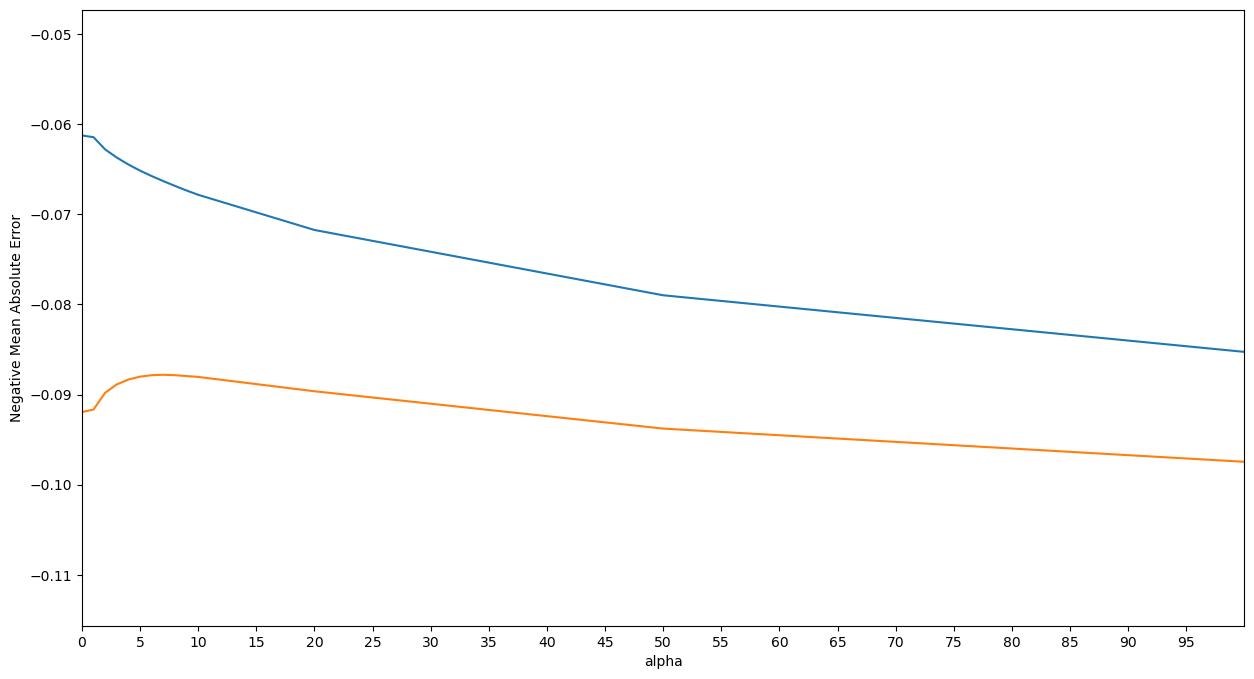

In [116]:
# Plotting the mean test and train scores

plt.figure(figsize=(15, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.show()

In [117]:
# Setting alpha as 7, building a ridge regression model
alpha = 7
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=7)

In [118]:
# Predticting on X_train
y_train_pred_ridge = ridge.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred_ridge)

0.9267599201201169

In [119]:
# Predicting on the X_test
y_test_pred_ridge = ridge.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred_ridge)

0.8605636946052908

In [120]:
# checking the parameters of the Ridge Regression model
print(ridge.intercept_)
model_params_ridge = list(ridge.coef_)
model_params_ridge.insert(0, ridge.intercept_)
model_params_ridge = [round(x, 3) for x in model_params_ridge]
cols = X.columns
cols = cols.insert(0, 'constant')
sorted(list(zip(model_params_ridge, cols)), key=lambda x: abs(x[0]), reverse=True)

8.982681542557142


[(8.983, 'constant'),
 (0.117, 'OverallQual_9'),
 (-0.116, 'OverallCond_3'),
 (0.109, 'Neighborhood_StoneBr'),
 (0.09, 'Neighborhood_Crawfor'),
 (-0.087, 'LotShape_IR3'),
 (0.087, 'RoofMatl_WdShngl'),
 (-0.085, 'Neighborhood_MeadowV'),
 (0.08, 'Neighborhood_NridgHt'),
 (-0.079, 'MSSubClass_30'),
 (0.072, 'Exterior1st_BrkFace'),
 (0.072, 'CentralAir_Y'),
 (-0.071, 'KitchenQual_TA'),
 (0.07, 'GarageCars'),
 (-0.07, 'Neighborhood_Edwards'),
 (-0.069, 'Neighborhood_SWISU'),
 (0.069, 'Functional_Typ'),
 (0.068, 'MSSubClass_70'),
 (0.068, 'OverallQual_8'),
 (0.067, 'SaleCondition_Normal'),
 (0.066, 'OverallCond_7'),
 (-0.065, 'GarageQual_Fa'),
 (-0.062, 'MSSubClass_160'),
 (0.062, 'MSZoning_FV'),
 (-0.06, 'KitchenAbvGr'),
 (-0.06, 'BldgType_Twnhs'),
 (-0.058, 'OverallQual_4'),
 (-0.058, 'KitchenQual_Gd'),
 (0.056, 'SaleCondition_Partial'),
 (-0.055, 'OverallCond_4'),
 (0.051, 'Heating_GasW'),
 (0.051, 'SaleCondition_Alloca'),
 (0.05, 'MSZoning_RL'),
 (0.05, 'OverallCond_9'),
 (-0.05, 'BsmtFi

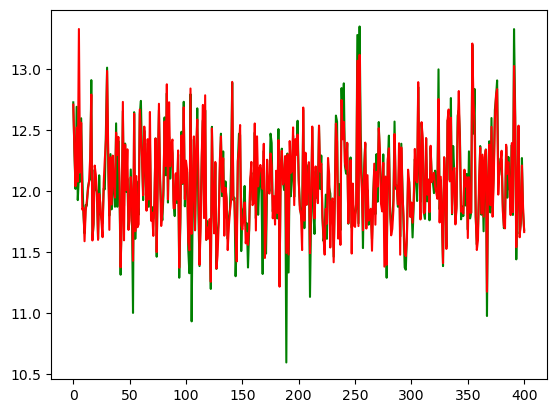

In [121]:
# plotting y_test v/s y_test_pred_ridge
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='green')
plt.plot(ind, y_test_pred_ridge, color='red')
plt.show()

### Lasso Regression

In [122]:

lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [123]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.074996,0.002284,0.002401,4.887377e-04,0.0001,{'alpha': 0.0001},-0.090176,-0.093022,-0.075218,-0.091882,...,-0.090345,0.008499,2,-0.058486,-0.058275,-0.062564,-0.054907,-0.058323,-0.058511,0.002429
1,0.066403,0.001738,0.002799,4.002581e-04,0.001,{'alpha': 0.001},-0.095991,-0.090256,-0.069972,-0.088005,...,-0.090058,0.011826,1,-0.075470,-0.073740,-0.078640,-0.067005,-0.071498,-0.073271,0.003906
2,0.012195,0.001717,0.002200,4.004242e-04,0.01,{'alpha': 0.01},-0.128615,-0.115042,-0.089902,-0.109300,...,-0.115366,0.015537,3,-0.108018,-0.108559,-0.115897,-0.102370,-0.105917,-0.108152,0.004441
3,0.029203,0.003967,0.002597,4.870698e-04,0.05,{'alpha': 0.05},-0.133070,-0.120255,-0.095794,-0.111043,...,-0.119539,0.015122,11,-0.113107,-0.113964,-0.120647,-0.106210,-0.109833,-0.112752,0.004801
4,0.023400,0.003929,0.002199,4.010937e-04,0.1,{'alpha': 0.1},-0.131922,-0.121319,-0.094706,-0.110558,...,-0.119179,0.015309,10,-0.112933,-0.113695,-0.120523,-0.106291,-0.109811,-0.112651,0.004725
5,0.021603,0.006913,0.002200,3.999234e-04,0.2,{'alpha': 0.2},-0.130058,-0.122604,-0.093491,-0.110281,...,-0.118669,0.015377,8,-0.112931,-0.113547,-0.120295,-0.106486,-0.109786,-0.112609,0.004594
6,0.016800,0.006462,0.002200,7.480992e-04,0.3,{'alpha': 0.3},-0.128749,-0.123034,-0.092998,-0.110183,...,-0.118298,0.015296,6,-0.113335,-0.113509,-0.120141,-0.107012,-0.110017,-0.112803,0.004380
7,0.014600,0.005124,0.002200,4.002339e-04,0.4,{'alpha': 0.4},-0.127606,-0.123488,-0.092452,-0.110232,...,-0.118018,0.015302,4,-0.113930,-0.113650,-0.120137,-0.107713,-0.110541,-0.113194,0.004148
8,0.011998,0.003637,0.001800,4.004727e-04,0.5,{'alpha': 0.5},-0.127186,-0.124394,-0.092026,-0.110562,...,-0.118074,0.015404,5,-0.114631,-0.114019,-0.120260,-0.108603,-0.110973,-0.113697,0.003935
9,0.010621,0.001646,0.001994,8.563709e-06,0.6,{'alpha': 0.6},-0.127371,-0.125430,-0.091756,-0.111477,...,-0.118486,0.015566,7,-0.115172,-0.114571,-0.120500,-0.109590,-0.111613,-0.114289,0.003706


In [124]:
model_cv.best_params_

{'alpha': 0.001}

In [125]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int64')

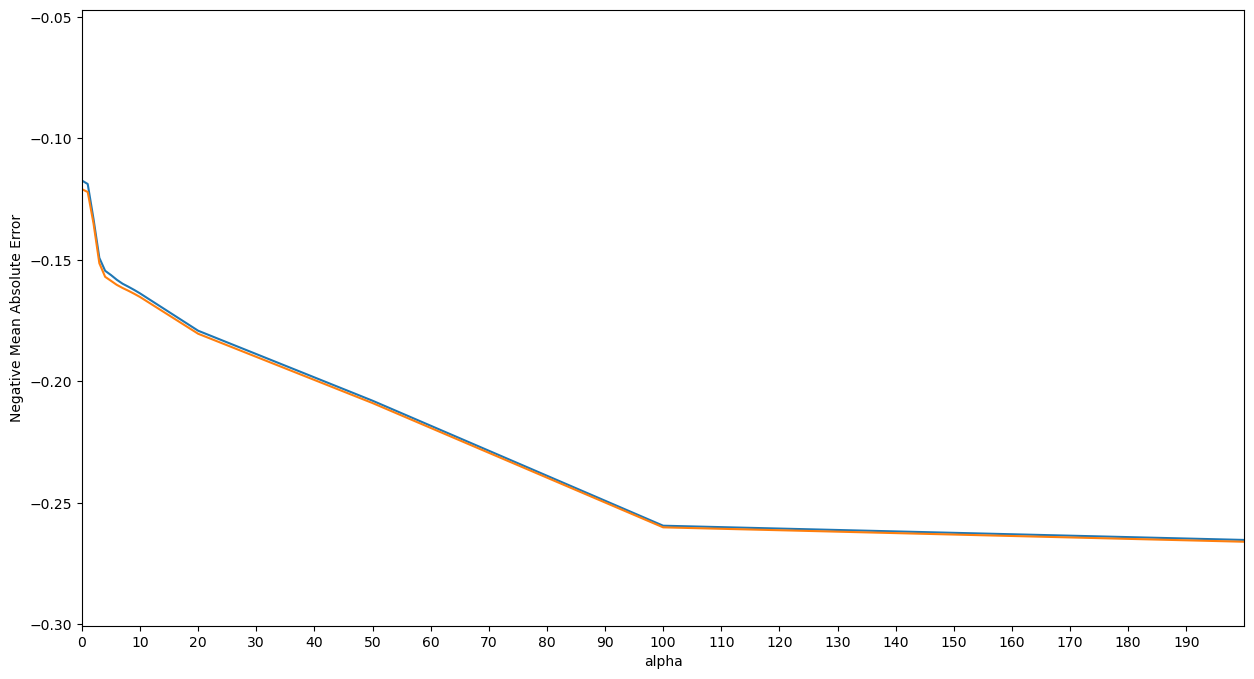

In [135]:
# Plotting the mean test and train scores
plt.figure(figsize=(15, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.show()

In [127]:
# Setting alpha as 0.001, building a lasso regression model
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [129]:
# Setting alpha as 0.001, building a lasso regression model
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [134]:
# Predicting on X_test
y_train_pred_lasso = lasso.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred_lasso)

0.9071049321190567

In [130]:
# Predicting on X_test
y_test_pred_lasso = lasso.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred_lasso)

0.862628258157357

In [131]:
# checking the parameters of the Lasso Regression model
model_params_lasso = list(lasso.coef_)
model_params_lasso.insert(0, lasso.intercept_)
model_params_lasso = [round(x, 3) for x in model_params_lasso]
cols = X.columns
cols = cols.insert(0, 'constant')
lasso_selected_features = []
for k, v in sorted(list(zip(model_params_lasso, cols)), key=lambda x:abs(x[0]), reverse=True)[1:131]:
    lasso_selected_features.append(v)
sorted(list(zip(model_params_lasso, cols)), key=lambda x: abs(x[0]), reverse=True)

[(2.601, 'constant'),
 (-0.179, 'OverallCond_3'),
 (0.142, 'OverallQual_9'),
 (0.105, 'Neighborhood_StoneBr'),
 (0.101, 'Neighborhood_Crawfor'),
 (-0.086, 'OverallCond_4'),
 (0.082, 'Neighborhood_NridgHt'),
 (-0.078, 'MSSubClass_30'),
 (0.078, 'SaleCondition_Partial'),
 (0.071, 'GarageCars'),
 (0.071, 'OverallQual_8'),
 (-0.063, 'BldgType_Twnhs'),
 (0.063, 'Exterior1st_BrkFace'),
 (-0.061, 'KitchenAbvGr'),
 (0.06, 'CentralAir_Y'),
 (-0.06, 'KitchenQual_TA'),
 (0.06, 'Functional_Typ'),
 (-0.052, 'LotShape_IR3'),
 (-0.052, 'BldgType_TwnhsE'),
 (0.049, 'MSSubClass_70'),
 (-0.049, 'Neighborhood_Edwards'),
 (0.047, 'SaleCondition_Normal'),
 (-0.044, 'HouseStyle_2Story'),
 (-0.044, 'OverallQual_4'),
 (-0.044, 'BsmtFinType1_Unf'),
 (0.043, 'BsmtExposure_Gd'),
 (-0.043, 'KitchenQual_Gd'),
 (0.041, 'Neighborhood_BrkSide'),
 (-0.04, 'OverallCond_5'),
 (-0.039, 'MSZoning_RM'),
 (-0.039, 'GarageQual_Fa'),
 (0.038, 'Fireplaces'),
 (-0.037, 'Neighborhood_MeadowV'),
 (0.036, 'LotConfig_CulDSac'),
 (0

In [140]:
lasso_selected_features

['OverallCond_3',
 'OverallQual_9',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'OverallCond_4',
 'Neighborhood_NridgHt',
 'MSSubClass_30',
 'SaleCondition_Partial',
 'GarageCars',
 'OverallQual_8',
 'BldgType_Twnhs',
 'Exterior1st_BrkFace',
 'KitchenAbvGr',
 'CentralAir_Y',
 'KitchenQual_TA',
 'Functional_Typ',
 'LotShape_IR3',
 'BldgType_TwnhsE',
 'MSSubClass_70',
 'Neighborhood_Edwards',
 'SaleCondition_Normal',
 'HouseStyle_2Story',
 'OverallQual_4',
 'BsmtFinType1_Unf',
 'BsmtExposure_Gd',
 'KitchenQual_Gd',
 'Neighborhood_BrkSide',
 'OverallCond_5',
 'MSZoning_RM',
 'GarageQual_Fa',
 'Fireplaces',
 'Neighborhood_MeadowV',
 'LotConfig_CulDSac',
 'Condition1_Norm',
 'ExterQual_TA',
 'BsmtFinType1_GLQ',
 'OverallQual_7',
 'OverallQual_5',
 'OverallCond_7',
 'FullBath',
 'GarageType_Attchd',
 'BsmtFullBath',
 'MSZoning_FV',
 'OverallQual_10',
 'Neighborhood_Somerst',
 'Condition1_Feedr',
 'RoofStyle_Gable',
 'HeatingQC_TA',
 'MoSold_4',
 'HalfBath',
 'Exterior1st_Stucco',
 'Mo

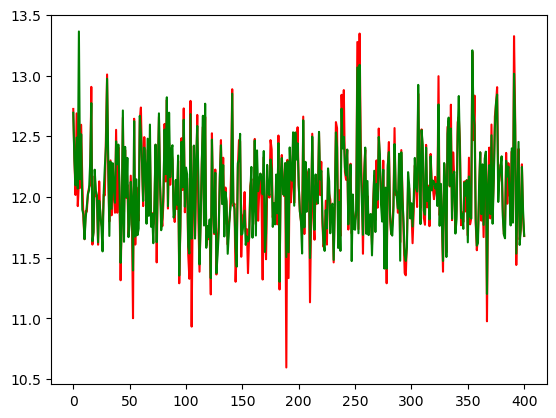

In [133]:
# Plotting y_test v/s y_test_pred_lasso
ind = [i for i in range(0, y_test.shape[0], 1)]
plt.plot(ind, y_test, color='red')
plt.plot(ind, y_test_pred_lasso, color='green')
plt.show()

### Observations

r2 score of train models as follows

- Liner - 0.9586507216186626
- Ridge - 0.9267599201201169
- Lasso - 0.9071049321190567

r2 score of test Models as follows

- Liner - 0.8477687108132392
- Ridge - 0.8605636946052908
- Lasso - 0.862628258157357


### Conclusion

Looking at the training scores, the Linear model has the highest R² score. However, when we evaluate the models on the test set, the Lasso model has the highest R² score.

As we know the higher the R² score, the better the model fits the data. So We could simply choose the model with the highest R² score on the test set (in my case, the Lasso model), But it's also important to consider the difference between the training and test scores. Because we want to understand how good our model generalize well with new, unseen data.

In our case, the Linear model has a relatively large drop from the training score to the test score compared to the Ridge and Lasso models. This clearly shows that, the Linear model is overfitting the training data.

Coming to the Lasso and Ridge models, they have smaller differences between their training and test scores, Hence they would be better at generalizing to new data. Between these two, the Lasso model has a slightly higher test score, Hence Lasso would be the best choice for us.

### Problem Conclusion

- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house.

In [138]:
for feature in lasso_selected_features[:10]:
    print(f"- {feature}")

- OverallCond_3
- OverallQual_9
- Neighborhood_StoneBr
- Neighborhood_Crawfor
- OverallCond_4
- Neighborhood_NridgHt
- MSSubClass_30
- SaleCondition_Partial
- GarageCars
- OverallQual_8


The significant variables in predicting the price of a house are the ones selected by the Lasso regression, such as `OverallCond_3`, `OverallQual_9`, `Neighborhood_StoneBr`, and so on. These variables collectively describe the price of a house effectively as indicated by the model's performance.

### Calculations for Assignment Part 2

In [141]:
# Setting alpha as 0.002, building a lasso regression model
alpha = 0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [142]:
# Predicting on X_test
y_train_pred_lasso = lasso.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred_lasso)

0.8835594272287364

In [143]:
# Predicting on X_test
y_test_pred_lasso = lasso.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred_lasso)

0.8473596031453781

In [147]:
# checking the parameters of the Lasso Regression model
model_params_lasso = list(lasso.coef_)
model_params_lasso.insert(0, lasso.intercept_)
model_params_lasso = [round(x, 3) for x in model_params_lasso]
cols = X.columns
cols = cols.insert(0, 'constant')
lasso_selected_features = []
for k, v in sorted(list(zip(model_params_lasso, cols)), key=lambda x:abs(x[0]), reverse=True)[1:131]:
    lasso_selected_features.append(v)
sorted(list(zip(model_params_lasso, cols)), key=lambda x: abs(x[0]), reverse=True)

[(3.151, 'constant'),
 (0.119, 'OverallQual_9'),
 (-0.105, 'OverallCond_3'),
 (0.065, 'GarageCars'),
 (0.065, 'Neighborhood_Crawfor'),
 (0.06, 'SaleCondition_Partial'),
 (0.056, 'Functional_Typ'),
 (-0.054, 'MSZoning_RM'),
 (-0.053, 'OverallCond_4'),
 (0.052, 'OverallQual_8'),
 (0.051, 'Neighborhood_NridgHt'),
 (-0.047, 'MSSubClass_30'),
 (-0.044, 'OverallQual_4'),
 (0.044, 'CentralAir_Y'),
 (-0.044, 'KitchenQual_TA'),
 (0.043, 'Neighborhood_StoneBr'),
 (-0.042, 'KitchenAbvGr'),
 (0.042, 'Fireplaces'),
 (0.038, 'Exterior1st_BrkFace'),
 (-0.038, 'ExterQual_TA'),
 (-0.036, 'Neighborhood_Edwards'),
 (0.032, 'OverallCond_7'),
 (-0.032, 'BsmtFinType1_Unf'),
 (0.029, 'Condition1_Norm'),
 (0.029, 'BsmtFinType1_GLQ'),
 (-0.026, 'MSSubClass_160'),
 (0.025, 'BsmtExposure_Gd'),
 (-0.023, 'OverallQual_5'),
 (-0.022, 'OverallCond_5'),
 (0.02, 'GarageType_Attchd'),
 (0.02, 'SaleCondition_Normal'),
 (-0.017, 'KitchenQual_Gd'),
 (0.016, 'LotConfig_CulDSac'),
 (0.016, 'Neighborhood_BrkSide'),
 (-0.016,

In [144]:
# Setting alpha as 14, building a ridge regression model
alpha = 14
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=14)

In [145]:
# Predticting on X_train
y_train_pred_ridge = ridge.predict(X_train)

# Checking the r2_score
r2_score(y_train, y_train_pred_ridge)

0.9193571791510418

In [146]:
# Predicting on the X_test
y_test_pred_ridge = ridge.predict(X_test)

# Checking the r2_score
r2_score(y_test, y_test_pred_ridge)

0.8599242641188087

In [148]:
# checking the parameters of the Ridge Regression model
print(ridge.intercept_)
model_params_ridge = list(ridge.coef_)
model_params_ridge.insert(0, ridge.intercept_)
model_params_ridge = [round(x, 3) for x in model_params_ridge]
cols = X.columns
cols = cols.insert(0, 'constant')
sorted(list(zip(model_params_ridge, cols)), key=lambda x: abs(x[0]), reverse=True)

8.67278224502604


[(8.673, 'constant'),
 (0.095, 'OverallQual_9'),
 (-0.09, 'OverallCond_3'),
 (0.083, 'Neighborhood_StoneBr'),
 (0.076, 'Neighborhood_Crawfor'),
 (0.069, 'GarageCars'),
 (0.068, 'Neighborhood_NridgHt'),
 (-0.067, 'MSSubClass_30'),
 (-0.063, 'KitchenQual_TA'),
 (-0.062, 'Neighborhood_Edwards'),
 (0.062, 'CentralAir_Y'),
 (-0.061, 'LotShape_IR3'),
 (0.061, 'Functional_Typ'),
 (-0.059, 'Neighborhood_MeadowV'),
 (-0.059, 'OverallQual_4'),
 (0.059, 'OverallCond_7'),
 (0.059, 'Exterior1st_BrkFace'),
 (0.058, 'MSSubClass_70'),
 (0.057, 'SaleCondition_Normal'),
 (0.056, 'OverallQual_8'),
 (0.053, 'RoofMatl_WdShngl'),
 (-0.052, 'MSSubClass_160'),
 (-0.052, 'OverallCond_4'),
 (-0.05, 'Neighborhood_SWISU'),
 (-0.049, 'KitchenAbvGr'),
 (-0.049, 'BldgType_Twnhs'),
 (-0.049, 'KitchenQual_Gd'),
 (-0.049, 'GarageQual_Fa'),
 (-0.046, 'BsmtFinType1_Unf'),
 (0.046, 'SaleCondition_Partial'),
 (0.044, 'MSZoning_FV'),
 (0.04, 'Fireplaces'),
 (-0.04, 'ExterQual_TA'),
 (-0.039, 'BldgType_TwnhsE'),
 (-0.039, 'O